## I. Load dữ liệu voice

In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
import time
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
voice=pd.read_csv('voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


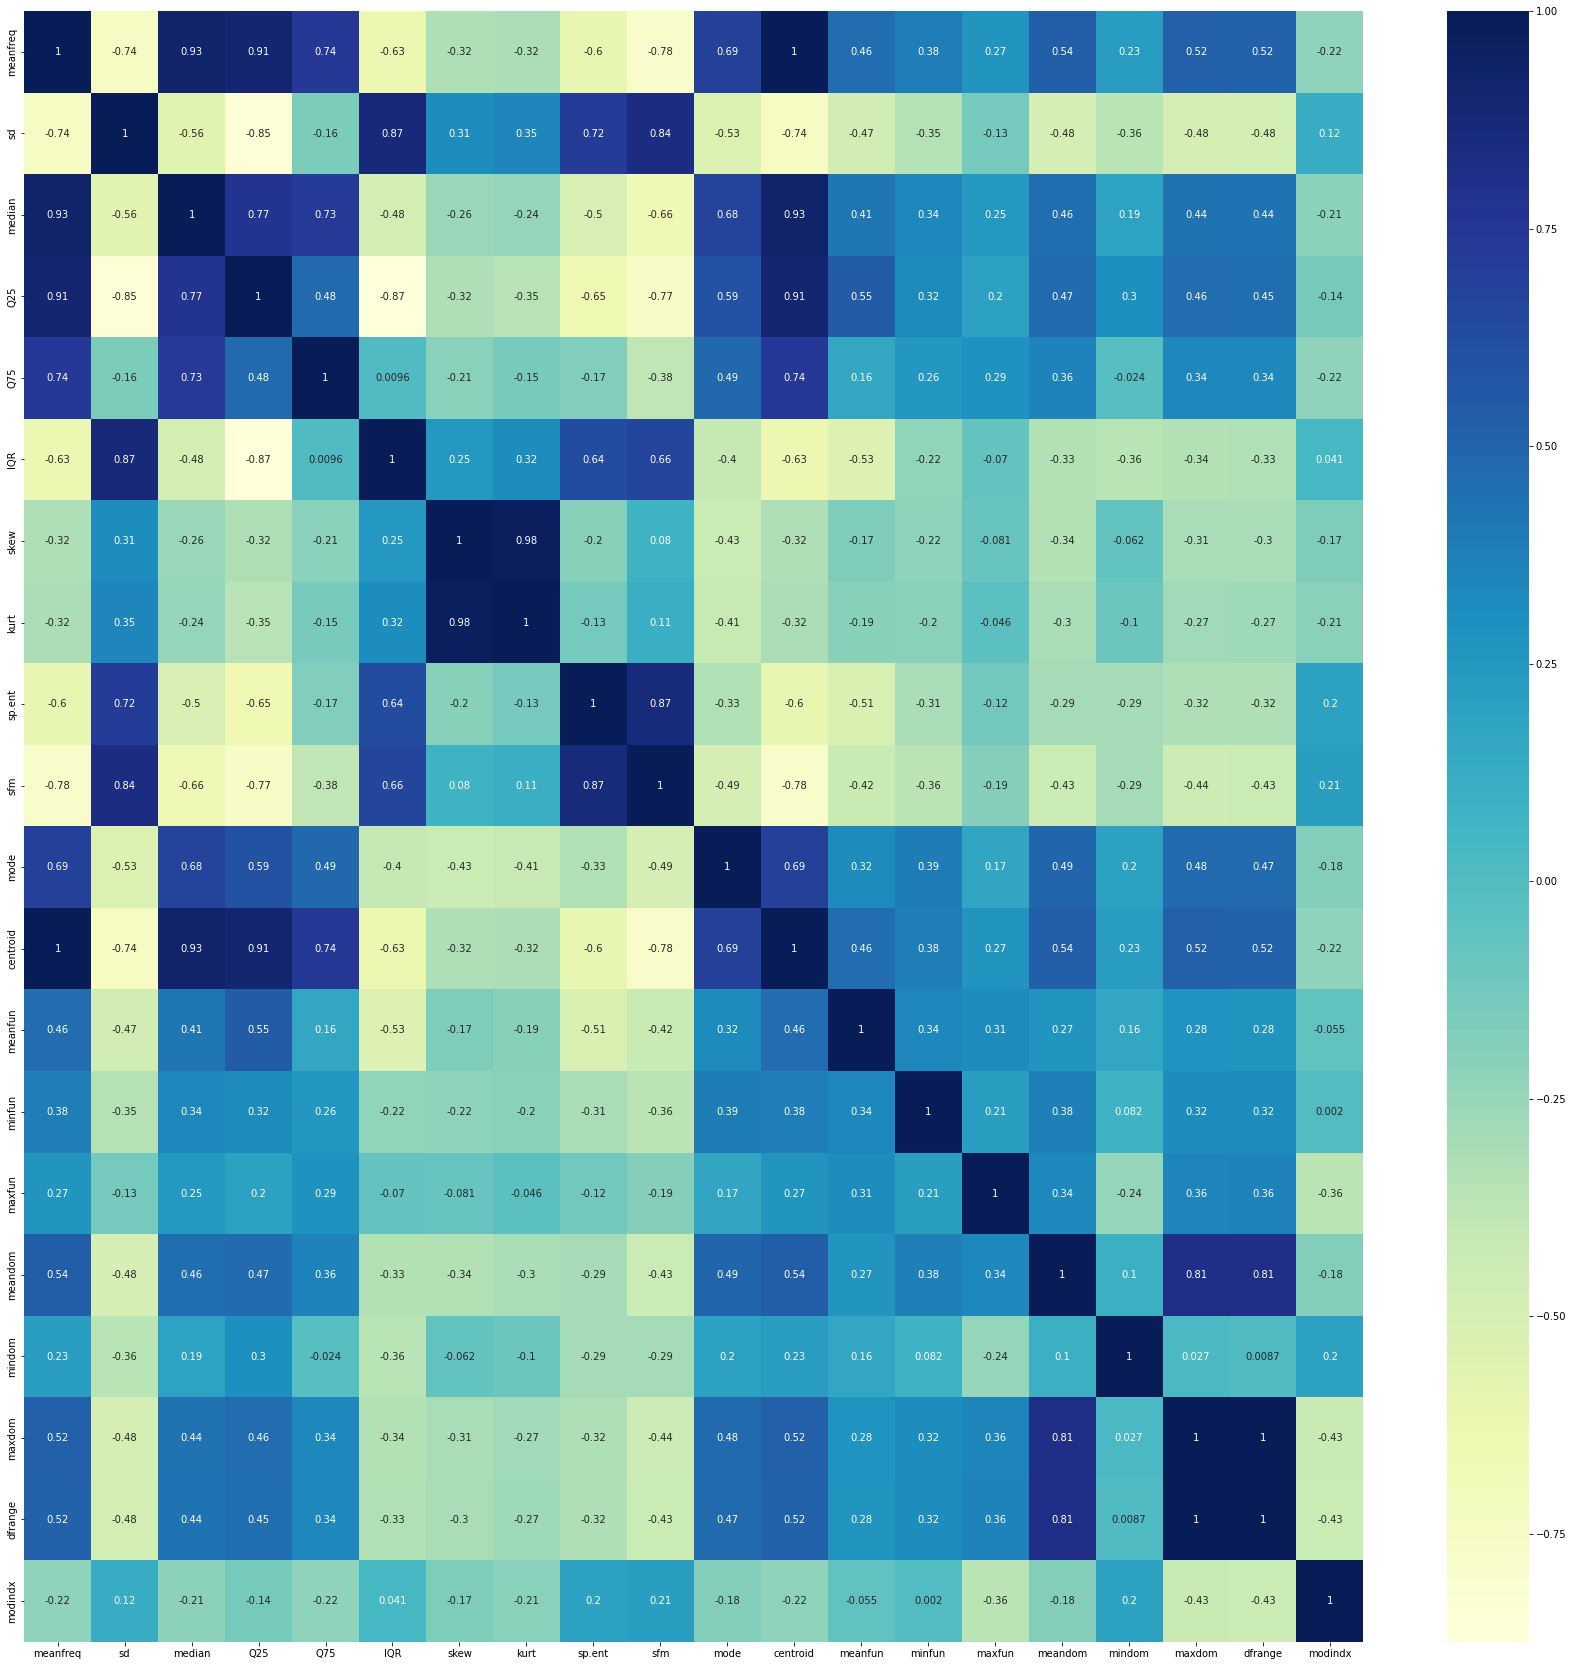

In [4]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(30)
dataplot = sb.heatmap(voice.corr(), cmap='YlGnBu', annot = True)
plt.show()

## II. Chuẩn hóa dữ liệu đầu vào và sử dụng biến giả cho nhãn labels 

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [6]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
#voice[:]=preprocessing.RobustScaler().fit_transform(voice)
#voice.head()

In [7]:
X = voice.iloc[:, :-1]
y = voice["label"]

In [8]:
print(X.shape)
print(y.shape)

(3168, 20)
(3168,)


## III. Sử dụng phương pháp tối ưu Stochastic Average Gradient Descent từ thư viện Scikit-learn cho mô hình Logistic Regression:

In [9]:
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.utils import shuffle
import time

In [10]:
start_time1 = time.time()
model = SKLogisticRegression(penalty='l2', tol=0.0001, solver='sag', max_iter=200, verbose=0, n_jobs=1)
target_names = ['female', 'male']
model.fit(X,y)
total_time_with_sagd = time.time() - start_time1

In [11]:
y_pred1=model.predict(X)
print(classification_report(y, y_pred1, target_names=target_names, digits=4))
print("Total loss: ", log_loss(y, y_pred1))
print("Time for fitting: ", total_time_with_sagd)

              precision    recall  f1-score   support

      female     0.9788    0.9609    0.9697      1584
        male     0.9616    0.9792    0.9703      1584

    accuracy                         0.9700      3168
   macro avg     0.9702    0.9700    0.9700      3168
weighted avg     0.9702    0.9700    0.9700      3168

Total loss:  1.0357428448728503
Time for fitting:  0.01595902442932129


## IV. Tự xây dựng các thuật toán tối ưu Gradient Descent, Stochastic Gradient Descent và Mini Batch Gradient Descent cho mô hình Logistic Regression

### Logistic Regression

In [12]:
def sigmoid(z):
    return 1 / (1 + np.e**(-z))

def gradient(X, y_pred, y):
    return np.dot(X.transpose(), (y_pred - y))

def logreg_cost(y, y_pred):
    return -1/y.shape[0] * np.sum((y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)))

class LogisticRegression:
    def __init__(self, optimizer, step_size, steps=1000):
        self.optimizer = optimizer
        self.step_size = step_size
        self.steps = steps
        self.params = None
        self.cost = None
        
    def fit(self, X, y):
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        y = np.expand_dims(y, axis=1)
        self.params, self.cost  = self.optimizer(X, y, self.step_size, self.steps)
    
    def predict(self, X):
        X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        y_pred = sigmoid(np.dot(X, self.params))
        return np.squeeze(y_pred, axis=1)
    
    def total_cost(self, y, y_pred):
        return logreg_cost(y, y_pred)

### Gradient Descent

In [13]:
def gradient_descent(X, y, step_size, steps):
    params = np.zeros((X.shape[1], 1))
    step_numb = 0
    while step_numb < steps:
        y_pred = sigmoid(np.dot(X, params))
        grad = gradient(X, y_pred, y)
        params -= step_size * grad
        step_numb += 1
    cost = logreg_cost(y, y_pred)
    return params, cost

In [14]:
start_time2 = time.time()
logreg_with_gd = LogisticRegression(gradient_descent, 10**-3, 10000)
logreg_with_gd.fit(X, y)
total_time_with_gd = time.time() - start_time2

In [15]:
y_pred2 = logreg_with_gd.predict(X)
y_pred2 = (y_pred2 >= 0.5).astype(int)
target_names = ['female', 'male']
print(classification_report(y, y_pred2, target_names=target_names, digits=4))
print("Total loss: ", log_loss(y, y_pred2))
# print("The cost: ",logreg_with_gd.total_cost(y, y_pred))
print("Time for fitting: ", total_time_with_gd)

              precision    recall  f1-score   support

      female     0.9772    0.9722    0.9747      1584
        male     0.9724    0.9773    0.9748      1584

    accuracy                         0.9747      3168
   macro avg     0.9748    0.9747    0.9747      3168
weighted avg     0.9748    0.9747    0.9747      3168

Total loss:  0.8722024286236698
Time for fitting:  1.8011817932128906


### Stochactis Gradient Descent

In [16]:
def stochastic_gradient_descent(X, y, step_size, steps):
    N = X.shape[0]
    d = X.shape[1]
    params = [np.random.randn(d, 1)]
    y_pred = sigmoid(np.dot(X, params))
    grad = gradient(X, y_pred, y)
    check_w_after = 20
    tol = 1e-4
    step_numb = 0  
#    params = np.zeros((X.shape[1], 1))
#    y_pred = sigmoid(np.dot(X, params))
#   grad = gradient(X, y_pred, y)
    while step_numb < steps:    
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[i,:].reshape(d,1).T
            yi = y[i].reshape(1,1)
            y_pred = sigmoid(np.dot(xi,params[-1]))
            grad = gradient(xi, y_pred, yi)
            params_new = params[-1] - step_size * grad
            cost = logreg_cost(yi, y_pred)
            step_numb += 1                     

 #           y_pred = sigmoid(np.dot(X, params))
 #           w_new = w[-1] + step_size*(yi - zi)*xi
            # stopping criteria
            if step_numb%check_w_after == 0:                
                if np.linalg.norm(params_new - params[-check_w_after]) < tol:
                    return params
            params.append(params_new)
    return params[-1], cost     

In [17]:
start_time_sgd = time.time()
logreg_with_sgd = LogisticRegression(stochastic_gradient_descent, 10**-3, 300000)
logreg_with_sgd.fit(X, y)
total_time_sgd = time.time() - start_time_sgd
y_pred = logreg_with_sgd.predict(X)
print("Total cost: ",logreg_with_sgd.total_cost(y, y_pred))

Total cost:  -0.0032651260782277634


In [18]:
y_pred = (y_pred >= 0.5).astype(int)
target_names = ['female', 'male']
print(classification_report(y, y_pred, target_names=target_names, digits=4))
print("Total loss: ", log_loss(y, y_pred))
print("Time for fitting: ", total_time_sgd)

              precision    recall  f1-score   support

      female     0.9761    0.9287    0.9518      1584
        male     0.9320    0.9773    0.9541      1584

    accuracy                         0.9530      3168
   macro avg     0.9540    0.9530    0.9529      3168
weighted avg     0.9540    0.9530    0.9529      3168

Total loss:  1.6244848602750337
Time for fitting:  7.025243043899536


### Mini Batch Gradient Descent

In [19]:
def mini_batch_gradient_descent(X, y, step_size, steps, batch_size=50):
    params = np.zeros((X.shape[1], 1))
    number_of_batches = y.shape[0] // batch_size + (0 if y.shape[0] % batch_size == 0 else 1)
    print("Number of batches: ", number_of_batches)
    step_numb = 0
    X_train = X.copy()
    y_train = y.copy()
    while step_numb < steps:
        curr_batch = 0
        while curr_batch < number_of_batches:
            # select mini batch from dataset
            start_range = batch_size*curr_batch
            end_range = batch_size*(curr_batch + 1)
            mini_X = X_train[start_range: end_range]
            mini_y = y_train[start_range: end_range]
            
            mini_y_pred = sigmoid(np.dot(mini_X, params))
            
            # calculate gradient with current mini batch
            grad = gradient(mini_X, mini_y_pred, mini_y)
            
            # update params
            params -= step_size * grad
            curr_batch += 1
            
        # shuffle data after every epoch
        X_train, y_train = shuffle(X_train, y_train)
        step_numb += 1
    y_pred = sigmoid(np.dot(X, params))
    cost = logreg_cost(y, y_pred)
    return params, cost

In [20]:
start_time3 = time.time()
logreg_with_mbgd = LogisticRegression(mini_batch_gradient_descent, 10**-3, 2000)
logreg_with_mbgd.fit(X, y)
total_time_with_mbgd = time.time() - start_time3

Number of batches:  64


In [21]:
y_pred3 = logreg_with_mbgd.predict(X)
y_pred3 = (y_pred3 >= 0.5).astype(int)
target_names = ['female', 'male']
print(classification_report(y, y_pred3, target_names=target_names, digits=4))
print("Total loss: ", log_loss(y, y_pred3))
# print("The cost: ",logreg_with_gd.total_cost(y, y_pred))
print("Time for fitting: ", total_time_with_mbgd)

              precision    recall  f1-score   support

      female     0.9764    0.9678    0.9721      1584
        male     0.9681    0.9766    0.9723      1584

    accuracy                         0.9722      3168
   macro avg     0.9723    0.9722    0.9722      3168
weighted avg     0.9723    0.9722    0.9722      3168

Total loss:  0.9594233277213013
Time for fitting:  2.054471492767334
